In [ ]:
import pickle
import pandas as pd
import json

In [ ]:
seq_offset = pickle.load(open("/home/yeep/project/algo_qq555/data/TencentGR_1k/seq_offsets.pkl", "rb"))
f = open("/home/yeep/project/algo_qq555/data/TencentGR_1k/seq.jsonl", "r")

In [ ]:
seq = json.loads(f.readline())

In [ ]:
for i, s in enumerate(seq):
    if s[2] is not None:
        print(i)
        break


In [ ]:
seq[98]

In [ ]:
from utils import read_pickle   

In [ ]:
pkl = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/creative_emb/emb_81_32.pkl")

In [ ]:
indexer = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/indexer.pkl")

In [ ]:
mapping = {v:k for k,v in indexer['i'].items()}

In [ ]:
pkl.get(20000697126)

In [ ]:
indexer['u']

In [ ]:
indexer['i']

In [ ]:
import json

In [ ]:
feat_dict = json.load(open("/home/yeep/project/alqq_generc/data/TencentGR_1k/item_feat_dict.json"))

In [ ]:
feat_dict

In [ ]:
import torch

In [ ]:
creative_id = torch.arange(10, 0, -1)

In [ ]:
a = torch.randint(0,10,size=(10, 10))

In [ ]:
creative_id[a]

In [ ]:
import sys
sys.path.append("/home/yeep/project/alqq_generc")
from utils import read_pickle,read_json
indexer = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/indexer.pkl")
item_feat_dict = read_json("/home/yeep/project/alqq_generc/data/TencentGR_1k/item_feat_dict.json")

In [ ]:
reid2creative_id = {v:k for k,v in indexer['i'].items()}

In [ ]:
feature = item_feat_dict.values()
creative_id = [reid2creative_id[int(i)] for i in item_feat_dict.keys()]

In [ ]:
import json
predict_set = []
for c, d in zip(creative_id,feature):
    predict_set.append(json.dumps({"creative_id":c, "features":d}))

In [ ]:
with open("/home/yeep/project/alqq_generc/data/test_data/predict_set.jsonl", "w") as f:
    for p in predict_set:
        f.write(p + "\n")

In [ ]:
indexer = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/indexer.pkl")
create_emb = read_pickle("/home/yeep/project/alqq_generc/data/TencentGR_1k/creative_emb/emb_81_32.pkl")
feature = read_json("/home/yeep/project/alqq_generc/data/TencentGR_1k/item_feat_dict.json")

In [ ]:
reid2creativeid = {v:k for k,v in indexer['i'].items()}

In [ ]:
reid2creative_id[2604]

In [ ]:
create_emb[20000680156]

In [ ]:
from timm.scheduler import CosineLRScheduler
from torch import nn
from torch.optim import Adam
from matplotlib import pyplot as plt

In [9]:
model = nn.Linear(10,10)
opt = Adam(model.parameters(),lr=0.3)

In [22]:
sched = CosineLRScheduler(opt,cycle_limit=2,t_initial=5,cycle_decay=0.6, t_in_epochs=False)

In [23]:
lr_hist = []
for i in range(30):
    opt.step()
    lr_hist.append(opt.param_groups[0]['lr'])
    sched.step_update(i)

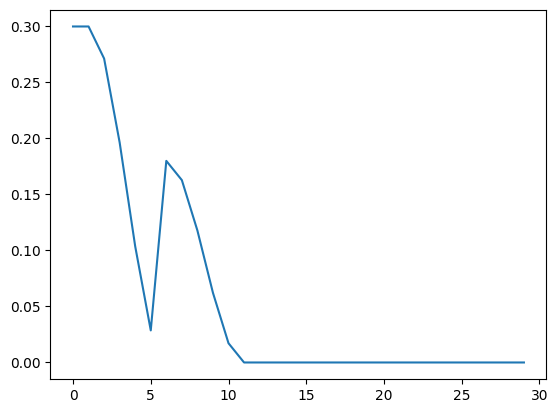

In [24]:
plt.plot(lr_hist)